In [ ]:
try:
    import tensorflow as tf
    print("TensorFlow imported successfully")
except ImportError:
    print("TensorFlow is not installed. Please install it using:")
    print("pip install tensorflow")
    print("or")
    print("conda install tensorflow")
    tf = None


ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help visualize the data space and the parameter space during training and has nothing to do with PyTorch.

In [2]:
# The class for plot the diagram

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

Making a radom dataset

In [3]:
import torch

# creating f(x) with a slope of 1 and a bias of -1
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X -1

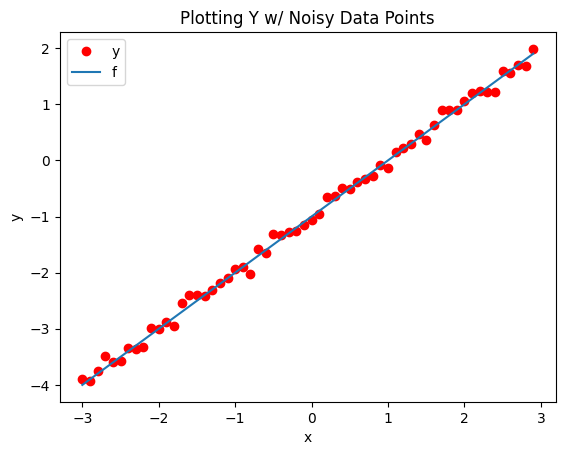

In [7]:
# Adding noise to the data
Y = f + 0.1 * torch.randn(X.size())

# Plotting the line and points with the noisy data
plt.plot(X.numpy(), Y.numpy(), 'ro', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.title('Plotting Y w/ Noisy Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Creating the model and the cost function (total loss)

<Figure size 640x480 with 0 Axes>

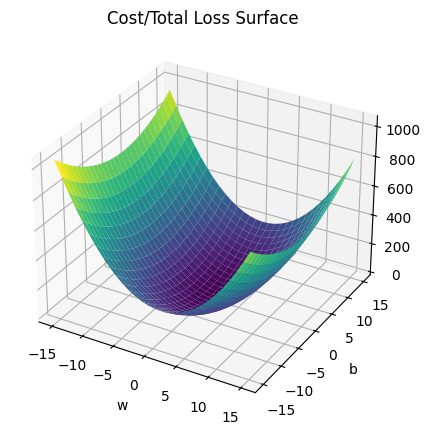

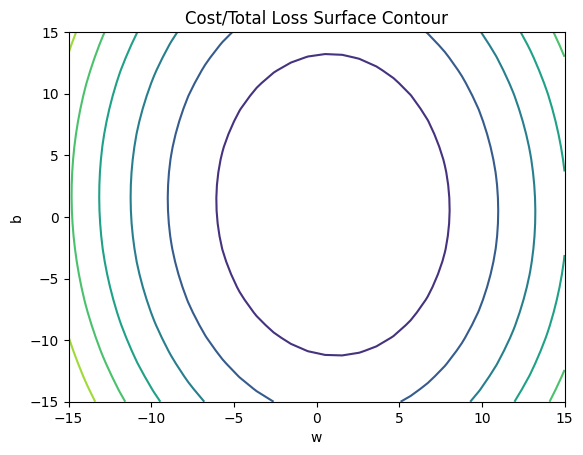

In [8]:
# Defining the forward function

def forward(x):
  return w * x + b

# Defining the MSE Loss function

def criterion(yhat, y):
  return torch.mean((yhat - y)**2)

# Creating the plot_error_surfaces to visualize the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

# Training the Model <br/>
Creating model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True

In [22]:
# defining the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

# Defining the learning rate and creating an empty list to track loss for each iteration

lr = 0.1
LOSS = []

In [23]:
# Defining the function for training the model

def train_model(iter):
  for epoch in range(iter):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    if epoch % 3 == 0:
      get_surface.plot_ps()

    LOSS.append(loss)

    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()


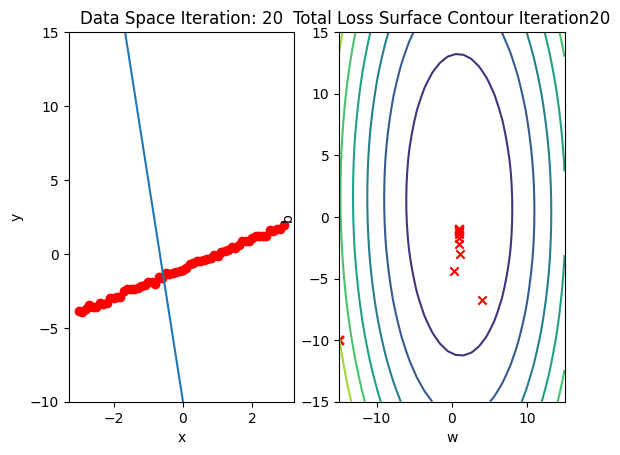

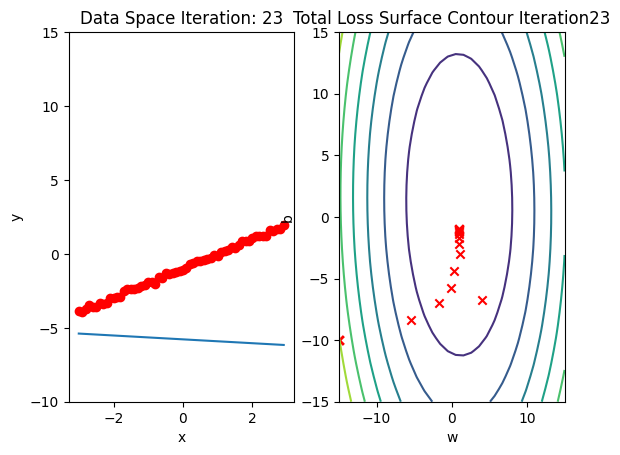

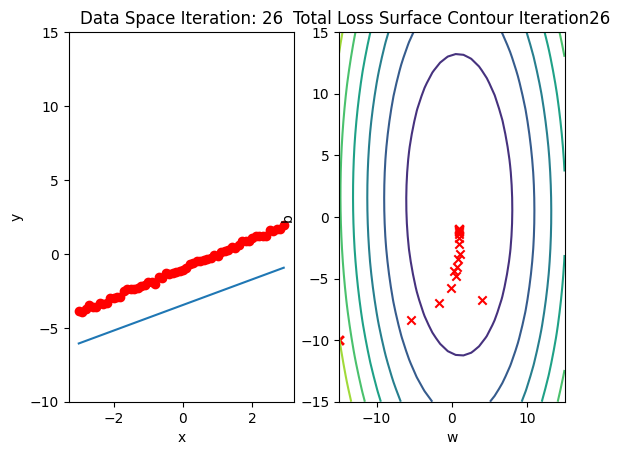

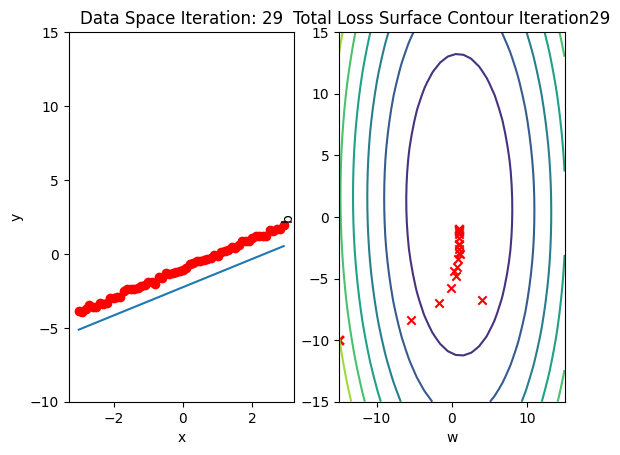

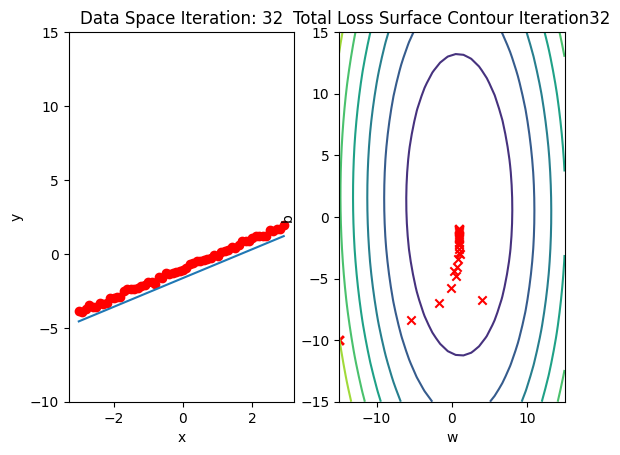

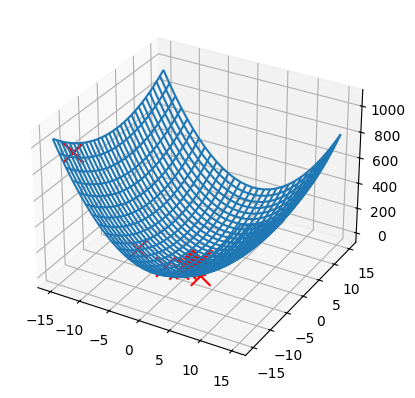

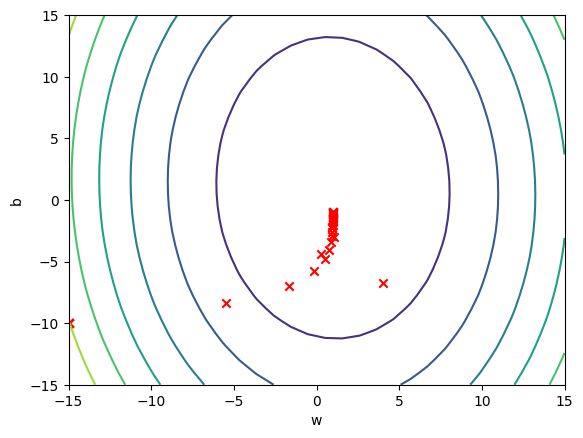

Text(38.347222222222214, 0.5, 'Cost')

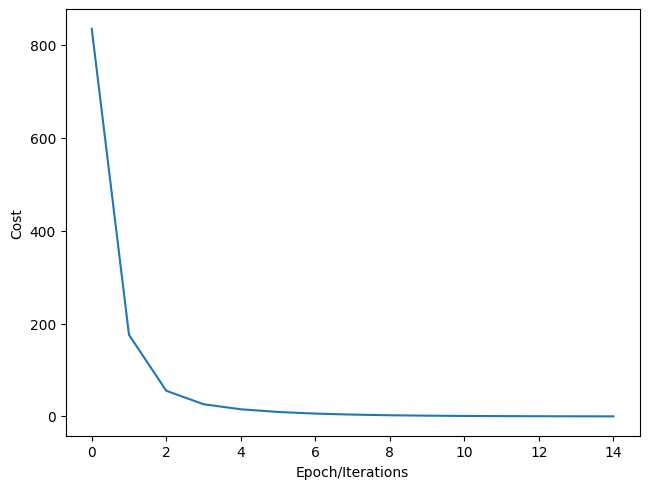

In [24]:
# Train the model on 15 epochs

train_model(15)

# Plotting the results of the trained model

get_surface.final_plot()
LOSS= [ loss.detach().numpy() for loss in LOSS]
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [29]:
# Training and plotting the result with lr = 0.2 a
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

In [30]:
# Defining the function for training the model

def my_train_model(iter):
  for epoch in range(iter):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    if epoch % 3 == 0:
      get_surface.plot_ps()

    LOSS2.append(loss)

    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()


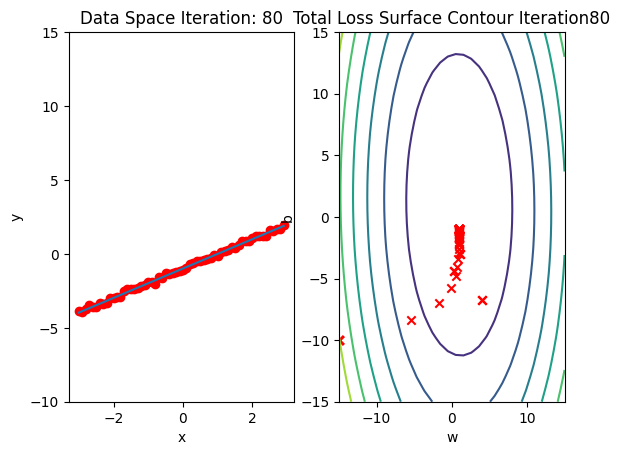

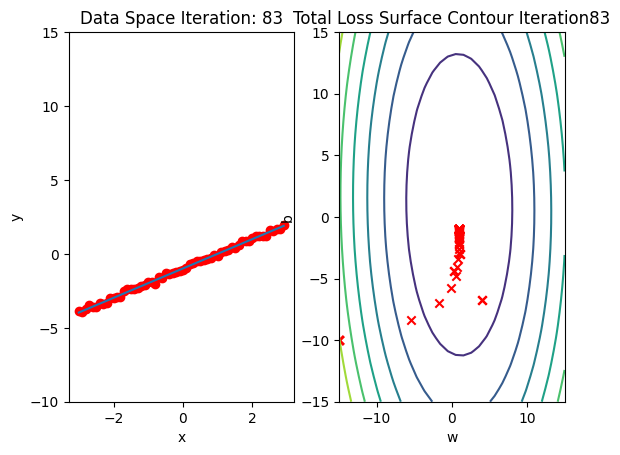

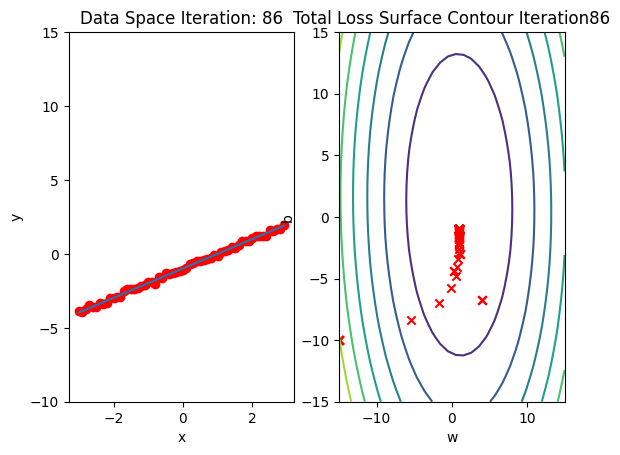

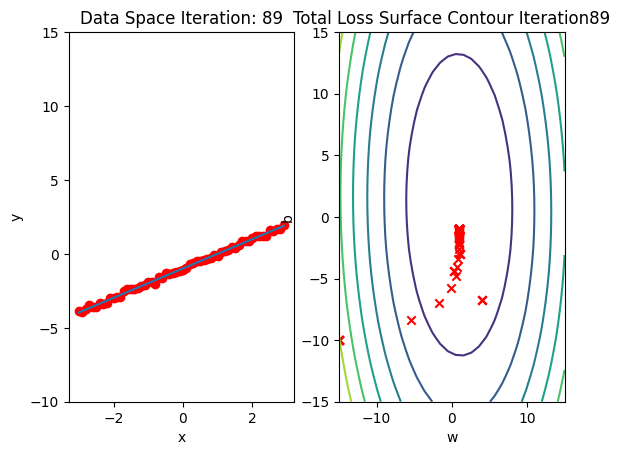

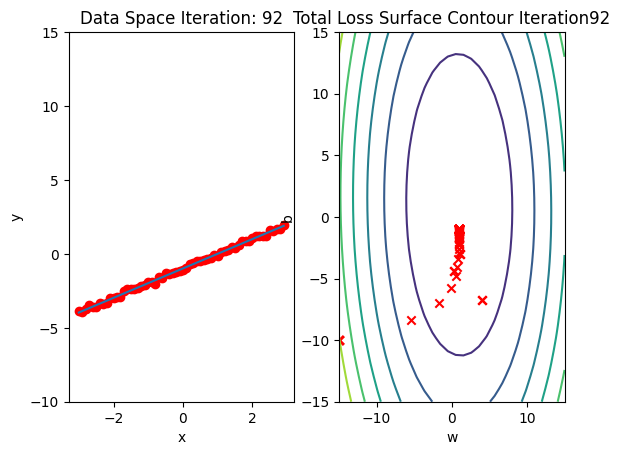

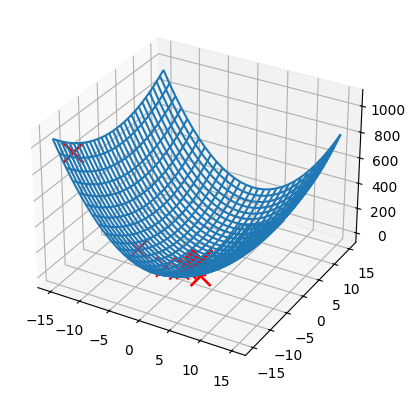

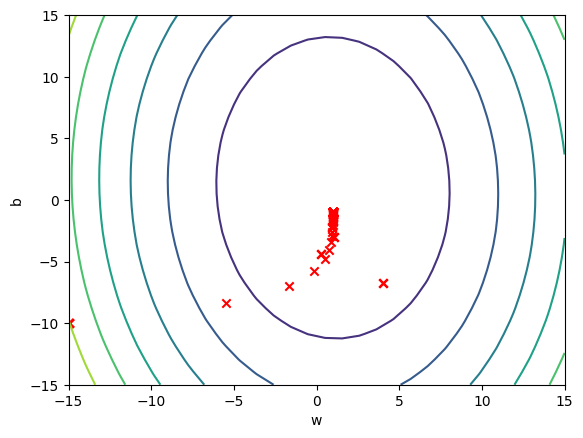

Text(38.347222222222214, 0.5, 'Cost')

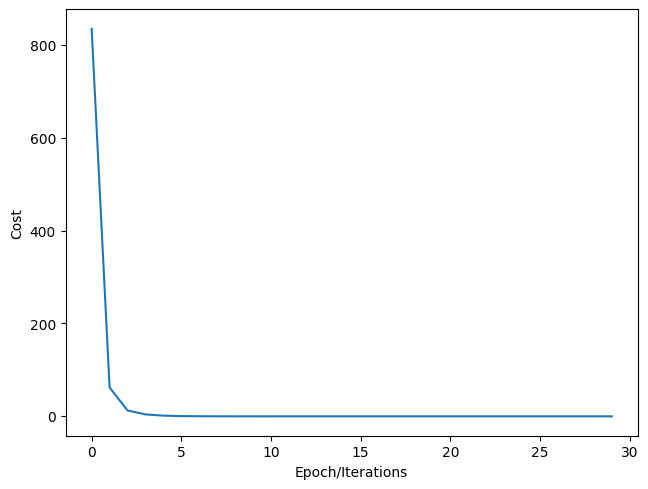

In [32]:
# Train the model on 15 epochs

my_train_model(15)

# Plotting the results of the trained model

get_surface.final_plot()
# Correcting the variable name to LOSS2 to process the losses from the second training run
LOSS2= [ loss.detach().numpy() for loss in LOSS2]
# Plotting LOSS2, not LOSS
plt.plot(LOSS2)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")